In [39]:
from keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [40]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [42]:
print(type(X_train))

<class 'numpy.ndarray'>


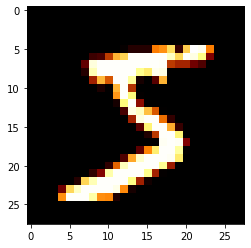

In [43]:
plt.imshow(X_train[0],cmap='afmhot')

In [44]:
y_train[0]

5

In [45]:
image_height,image_width = 28,28

In [46]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [47]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [48]:
X_train /= 255.0   # This step will change the values to stay between 0 - 1
X_test /= 255.0

In [49]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [50]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)


(60000, 10)
(10000, 10)


In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import load_img,array_to_img

In [58]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(784,)))  # Creates the first layes of the ANN with Dense class that is interlinked nodes
model.add(Dense(512, activation='relu')) # Creates the second layer of the ANN
model.add(Dense(10, activation='softmax')) #Creates the last layer or output layers of the ANN

In [59]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [64]:
#no. of input features * no. of nodes * bias = Param , Shape= NO. of nodes

print(784*512+512)  #1st Layer params
print(512*512+512) # 2nd Layer params
print(512*10+10) #OutputLayer params

401920
262656
5130


In [68]:
#Train the Model

history = model.fit(X_train,y_train, epochs = 20, validation_data= (X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 0.1826 - accuracy: 0.9449 - val_loss: 0.0881 - val_accuracy: 0.9717
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0797 - accuracy: 0.9752 - val_loss: 0.0815 - val_accuracy: 0.9757
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0571 - accuracy: 0.9816 - val_loss: 0.0701 - val_accuracy: 0.9797
Epoch 4/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.0814 - val_accuracy: 0.9766
Epoch 5/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0891 - val_accuracy: 0.9784
Epoch 6/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0799 - val_accuracy: 0.9798
Epoch 7/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0950 - val_ac

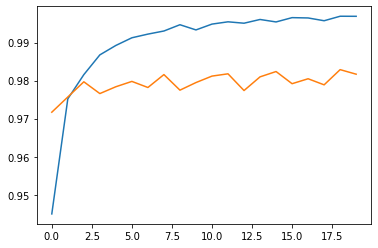

In [77]:
# Check the Accuracy of the model

plt.plot(history.history['accuracy'])   #Accuracy on the train data
plt.plot(history.history['val_accuracy'])  # Accuracy on the validation data - This tells the loss in the model.

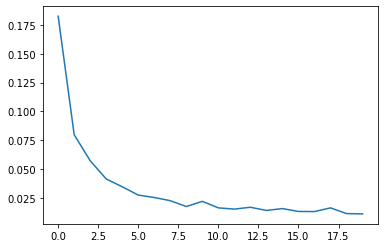

In [79]:
# Check loss

plt.plot(history.history['loss'])

In [80]:
# Accuracy in numbers

score = model.evaluate(X_test,y_test)
score

313/313 [==============================] - 1s 3ms/step - loss: 0.1251 - accuracy: 0.9817


[0.12514987587928772, 0.9817000031471252]